This is 1st Notebook in Week 2.

* Multiclass classification is different from multilabel
    * Multiclass - recognize if object is one of many, ex. digit [1-10]
    * Multilabel - recognize all objects, i.e. all handwritten digits [1-10]
* Softmax output activation
* ReLU activation for hidden layers
* CrossEntropy vs Sparse CrossEntropy
* Improved Softmax activation by using linear

In [45]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn.datasets as sk_inputs

# Softmax

In both softmax regression and neural networks with Softmax outputs, N outputs are generated and one output is selected as the predicted category. In both cases a vector $\mathbf{z}$ is generated by a linear function which is applied to a softmax function. The softmax function converts $\mathbf{z}$  into a probability distribution as described below. After applying softmax, each output will be between 0 and 1 and the outputs will add to 1, so that they can be interpreted as probabilities. The larger inputs  will correspond to larger output probabilities.
<center>  <img  src="./images/C2_W2_SoftmaxReg_NN.png" width="600" />  

The softmax function can be written:
$$a_j = \frac{e^{z_j}}{ \sum_{k=1}^{N}{e^{z_k} }} \tag{1}$$

The output $\mathbf{a}$ is a vector of length N, so for softmax regression, you could also write:

\begin{align}
\mathbf{a}(x) =
\begin{bmatrix}
P(y = 1 | \mathbf{x}; \mathbf{w},b) \\
\vdots \\
P(y = N | \mathbf{x}; \mathbf{w},b)
\end{bmatrix}
=
\frac{1}{ \sum_{k=1}^{N}{e^{z_k} }}
\begin{bmatrix}
e^{z_1} \\
\vdots \\
e^{z_{N}} \\
\end{bmatrix} \tag{2}
\end{align}

Which shows the output is a vector of probabilities. The first entry is the probability the input is the first category given the input $\mathbf{x}$ and parameters $\mathbf{w}$ and $\mathbf{b}$.  
Let's create a NumPy implementation:

In [46]:
def softmax(z):
    z_exp = np.exp(z)
    softmax = z_exp / np.sum(z_exp)
    return softmax

In [47]:
z = np.arange(1,5,1)
print(f"with z for each neuron = {z}, the softmax activation = {softmax(z)}")

with z for each neuron = [1 2 3 4], the softmax activation = [0.0320586  0.08714432 0.23688282 0.64391426]


# Cost

The loss function associated with Softmax, the cross-entropy loss, is:
\begin{equation}
  L(\mathbf{a},y)=\begin{cases}
    -log(a_1), & \text{if $y=1$}.\\
        &\vdots\\
     -log(a_N), & \text{if $y=N$}
  \end{cases} \tag{3}
\end{equation}

<img  src="./images/-log(x).png" width="400" />  

Where y is the target category for this example and $\mathbf{a}$ is the output of a softmax function. In particular, the values in $\mathbf{a}$ are probabilities that sum to one.
>**Recall:** In this course, Loss is for one example while Cost covers all examples. 
 
 
Note in (3) above, only the line that corresponds to the target contributes to the loss, other lines are zero. To write the cost equation we need an 'indicator function' that will be 1 when the index matches the target and zero otherwise. 
    $$\mathbf{1}\{y == n\} = =\begin{cases}
    1, & \text{if $y==n$}.\\
    0, & \text{otherwise}.
  \end{cases}$$
Now the cost is:
\begin{align}
J(\mathbf{w},b) = -\frac{1}{m} \left[ \sum_{i=1}^{m} \sum_{j=1}^{N}  1\left\{y^{(i)} == j\right\} \log \frac{e^{z^{(i)}_j}}{\sum_{k=1}^N e^{z^{(i)}_k} }\right] \tag{4}
\end{align}

Where $m$ is the number of examples, $N$ is the number of outputs. This is the average of all the losses.


# Inputs

Generate isotropic gaussian blobs for clustering. Centers n4 = centers of these blobs.

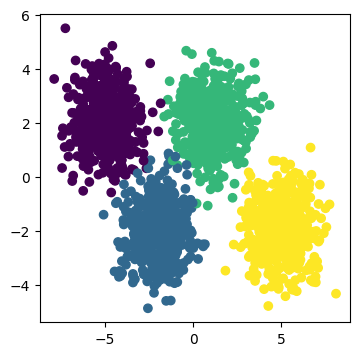

In [48]:
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
x_train, y_train = sk_inputs.make_blobs(n_samples=2000, centers=centers, cluster_std=1.0, random_state = 30)

fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_train[:,0],x_train[:,1],c=y_train)

# Model (logical, but not preferred choice)

* Softmax activation as output layer

In [49]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation="relu", name="L1"),
    tf.keras.layers.Dense(units=15, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=4, activation="softmax", name="L3"),
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(0.001))

model.fit(x_train, y_train,
          epochs = 10)

Epoch 1/10


63/63 [==============================] - 2s 2ms/step - loss: 0.7550
Epoch 2/10
63/63 [==============================] - 0s 2ms/step - loss: 0.2982
Epoch 3/10
63/63 [==============================] - 0s 2ms/step - loss: 0.1458
Epoch 4/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0911
Epoch 5/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0695
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0580
Epoch 7/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0511
Epoch 8/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0464
Epoch 9/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0423
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0391


In [50]:
prediction = model.predict(x_train)
print(prediction[:2])

63/63 [==============================] - 0s 1ms/step
[[2.0529460e-03 4.0128934e-03 9.6985185e-01 2.4082281e-02]
 [9.9525243e-01 4.7198399e-03 1.1205338e-05 1.6608115e-05]]


# Preferred model
* output layer -> linear, meaning <b>no activation</b>
* for historical reasons, the outputs in this form are referred to as *logits*
* loss function logits to True
* this removes rounding error from $(1 + 1/1000) - (1 - 1/1000) = 0.0019999999999998908$ vs $0.002$

In [51]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=25, activation="relu", name="L1"),
    tf.keras.layers.Dense(units=15, activation="relu", name="L2"),
    tf.keras.layers.Dense(units=4, activation="linear", name="L3") # changed here to linear
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # changed here to logits = True
              optimizer = tf.keras.optimizers.Adam(0.001),
              )

model.fit(x_train, y_train,
          epochs = 10)

Epoch 1/10
63/63 [==============================] - 1s 4ms/step - loss: 0.8443
Epoch 2/10
63/63 [==============================] - 0s 3ms/step - loss: 0.3750
Epoch 3/10
63/63 [==============================] - 0s 6ms/step - loss: 0.1737
Epoch 4/10
63/63 [==============================] - 0s 4ms/step - loss: 0.0940
Epoch 5/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0658
Epoch 6/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0530
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 0.0460
Epoch 8/10
63/63 [==============================] - 0s 7ms/step - loss: 0.0412
Epoch 9/10
63/63 [==============================] - 0s 3ms/step - loss: 0.0376
Epoch 10/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0349


Predictions are not probabilities

In [52]:
prediction = model.predict(x_train)
print(prediction[:2])

63/63 [==============================] - 0s 2ms/step
[[-2.386992   -1.3300505   4.6374273   0.30559582]
 [ 5.117122   -0.7232625  -5.2213717  -5.7520576 ]]


Predictions converted to probabilities

In [53]:
prediction_prob = tf.nn.softmax(prediction).numpy()
print(prediction_prob[:2])

[[8.7535835e-04 2.5188932e-03 9.8367679e-01 1.2928911e-02]
 [9.9704957e-01 2.8991455e-03 3.2267562e-05 1.8979814e-05]]


In [62]:
w, b = model.get_layer("L3").get_weights()
w.shape

(15, 4)

In [63]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 25)                75        
                                                                 
 L2 (Dense)                  (None, 15)                390       
                                                                 
 L3 (Dense)                  (None, 4)                 64        
                                                                 
Total params: 529
Trainable params: 529
Non-trainable params: 0
_________________________________________________________________


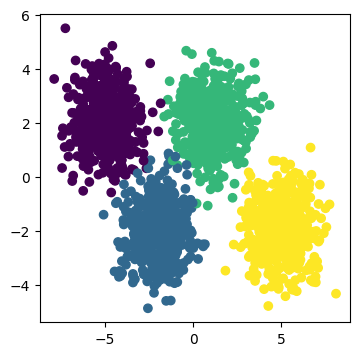

In [55]:
fig, ax = plt.subplots(1,1, figsize=(4,4))
ax.scatter(x_train[:,0],x_train[:,1],c=y_train)

# SparseCategoricalCrossentropy vs CategoricalCrossentropy

Both loss functions have same loss function. The only difference is format of targets/labels.

* If y is one-hot encoded, use CategoricalCrossentory, so result looks like [1,0,0], [0,1,0], [0,0,1]. It is quicker because uses 1 output layer, rather than vector

* If y is integer, use SparseCategoricalCrossentropy, so results for 3 class classification problem - [1], [2], [3]